#### 참고 : tensorflow.keras 공식 문서 (Official API Docs) @ https://www.tensorflow.org/api_docs/python/tf/keras

<br>

## 1. Data loading & preprocessing

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing # Scikit-learn (sklearn)

In [51]:
import sklearn
sklearn.__version__

'0.24.1'

In [52]:
# datasets.load # tab

In [18]:
datasets.load_boston() #.keys()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [53]:
# print(datasets.load_boston()['DESCR'])

In [54]:
# datasets.load_boston().data

In [55]:
df = pd.DataFrame(datasets.load_boston().data) # make a pandas DataFrame from numpy array
df.head() # 머리를 영어로?

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [56]:
x_data = datasets.load_boston().data 
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [42]:
sc = preprocessing.StandardScaler() # Apply standard scaling on x_data (Standardization)
x_data = sc.fit_transform(x_data)

print(x_data.shape) # 모양을 영어로?
print(y_data.shape) # 모양을 영어로?


(506, 13)
(506,)


<br>

## 2. Devide dataframe into X & Y -> Train X / Test X / Train Y / Test Y

In [24]:
from sklearn import model_selection

In [26]:
train_data, test_data, train_label, test_label = model_selection.train_test_split(x_data, y_data,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(354, 13)
(152, 13)
(354,)
(152,)


<br>

## 3. Build & Train the model 

In [27]:
import tensorflow as tf

# tf.keras 에 필요한 함수들이 모여있습니다.
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [28]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [33]:
model = models.Sequential() # Build up the "Sequence" of layers (Linear stack of layers)

# Dense-layer (with he-initialization)
model.add(layers.Dense(input_dim=df.shape[1], units=64, activation=None, kernel_initializer=initializers.he_normal())) # he-uniform initialization
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # elu or relu (or layers.ELU / layers.LeakyReLU)

model.add(layers.Dense(units=64, activation=None, kernel_initializer=initializers.he_normal()))
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=32, activation=None, kernel_initializer=initializers.he_normal())) 
model.add(layers.Activation('elu'))
model.add(layers.Dropout(rate=0.4)) # Dropout-layer

model.add(layers.Dense(units=1, activation=None)) 

In [36]:
# "Compile" the model description (Configures the model for training)

model.compile(optimizer=optimizers.Adam(), # Please try the Adam-optimizer
              loss=losses.mean_squared_error, # MSE 
              metrics=[metrics.mean_squared_error]) # MSE

In [37]:
# "Fit" the model on training data

history = model.fit(train_data, train_label, batch_size=100, epochs=1000, validation_split=0.3, verbose=0) 

In [38]:
# "Evaluate" the model on test data

result = model.evaluate(test_data, test_label)

print('loss (mean_squared_error) :', result[0])

5/5 [==============================] - 0s 1ms/step - loss: 16.2719 - mean_squared_error: 16.2719
loss (mean_squared_error) : 16.271875381469727


In [39]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

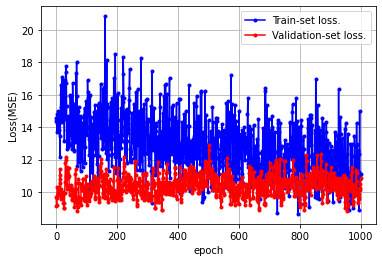

In [40]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

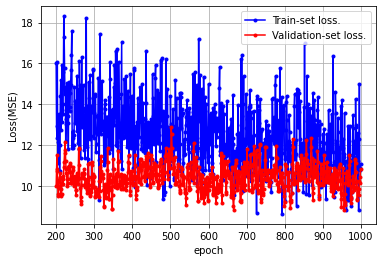

In [43]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

# epoch 200 ~ epoch 1000
plt.plot(x_len[200:], loss[200:], marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len[200:], val_loss[200:], marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

In [44]:
# "Predict" on test data

model.predict(test_data)

array([[21.916567 ],
       [29.914043 ],
       [22.413054 ],
       [ 9.771046 ],
       [20.37614  ],
       [19.208221 ],
       [22.917757 ],
       [19.368376 ],
       [20.517527 ],
       [23.206682 ],
       [ 8.274112 ],
       [ 4.5640883],
       [15.349756 ],
       [ 8.952961 ],
       [38.524128 ],
       [33.900505 ],
       [23.55424  ],
       [36.03709  ],
       [29.338213 ],
       [20.51106  ],
       [22.540724 ],
       [20.359964 ],
       [20.81365  ],
       [25.709341 ],
       [20.44024  ],
       [25.179794 ],
       [17.084593 ],
       [16.295671 ],
       [38.075077 ],
       [18.860773 ],
       [16.569017 ],
       [16.61418  ],
       [19.01497  ],
       [18.386803 ],
       [28.88645  ],
       [22.568747 ],
       [ 5.1021414],
       [43.76118  ],
       [ 9.129894 ],
       [17.169312 ],
       [22.029627 ],
       [21.486032 ],
       [18.245144 ],
       [19.50711  ],
       [18.380722 ],
       [24.74822  ],
       [20.476442 ],
       [11.31

In [45]:
sample_data = np.array([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

In [46]:
sample_data = sc.fit_transform(sample_data) # "transform" the sample data with fitted scaler (no "fit", just "transform")
model.predict(sample_data)

array([[12.490564]], dtype=float32)